<a href="https://colab.research.google.com/github/yuanic/beyond_designations/blob/master/BAX_452_Beyond_Designations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Designations: Classifying Roles by Job Descriptions



![alt text](https://raw.githubusercontent.com/yuanic/beyond_designations/master/Hiring%20Banner.jpg)

As we approach the recruiting season, we are often asked about what roles we are interested in. Some common roles that a MSBA class of graudates will likely pursue include Data Analyst, Business Analyst, Marketing Analytics, Data Scientist and Product Manager and more.

Yet during my search, desginations are sometimes confusing. 

**Example of Questions to Answer?**

* How similar are product analytics and prodcut management rolesr?
*  Data Science  - Product Analytics. Is that really a Data Science Role of more or a Product Analytics role. Is there really a distinction? 
* Are all data anlyst role "basic"

I decided to look at job descriptions in an attempt to tease out the differences.

## 1. Get Data

### 1.0 Pre Set Up: Installing Libraries

In [0]:
!pip -q install -U textblob

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob
import urllib.request
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
from PIL import Image
from urllib.request import urlopen

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 1.1 Get Initial List of Postings

In [0]:
postings = pd.read_csv("https://raw.githubusercontent.com/yuanic/beyond_designations/master/indeed_job_url.csv")

In [5]:
postings.head()

,Company,JobID,Published Title,Inferred Title,Known Name
0,Hired,7a3af8c40410263b,Business Intelligence Analyst,Business Intelligence,N
1,Sound Physicians,7d2b26d7d1ff22d2,"Senior Analyst, Business Intelligence & Analytics",Business Intelligence,N
2,Skillz Inc.,04b53a5dc7cfe058,Business Intelligence Analyst,Business Intelligence,N
3,Uber,a30d683bba2b43f6,Business Intelligence Analyst,Business Intelligence,Y
4,Dolls Kill,d8c8fd8bf063435e,BI Analyst,Business Intelligence,N


In [6]:
len(postings)

394

![indeed_where_we_get_out_data](https://github.com/yuanic/beyond_designations/blob/master/data_source_description.png?raw=true/)

### 1.2 Scraping Indeed Website

In [7]:
%time
company_name = []
job_description = []


## get data loop through postings
for i in range(0,len(postings),1):
#for i in range(0,5,1):

  try:
    company=postings['Company'][i]
    target_url="https://www.indeed.com/viewjob?jk="+postings['JobID'][i]+"&tk=1d4gjl7v4bhot805&from=serp&vjs=3"
    page = urllib.request.urlopen(target_url) #For python 3 use urllib.request.urlopen(target_url)
    soup = BeautifulSoup(page)
    text = soup.find_all("div", attrs={"jobsearch-JobComponent-description"})[0].getText()
    company_name.append(company)
    job_description.append(text)
  except:
    print(target_url)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
https://www.indeed.com/viewjob?jk=bb4254213f99215a&tk=1d4gjl7v4bhot805&from=serp&vjs=3


![indeed_data_scraping_selecting_description_method](https://github.com/yuanic/beyond_designations/blob/master/data_source_scraping_mtd.png?raw=true)





In [0]:
df_name = pd.DataFrame(company_name)
df_job = pd.DataFrame(job_description)
data = pd.concat([df_name,df_job],axis=1)
data = pd.concat([data,postings[['JobID', 'Published Title', 'Inferred Title', 'Known Name']]],axis=1)
data.columns = ['Company','Job_Description','JobID','Published_Title','Inferred_Title','Known_Name']

In [9]:
data.head()

,Company,Job_Description,JobID,Published_Title,Inferred_Title,Known_Name
0,Hired,We're on a mission to help get everyone a job ...,7a3af8c40410263b,Business Intelligence Analyst,Business Intelligence,N
1,Sound Physicians,"POSITION SUMMARY: Analysis, data modeling, and...",7d2b26d7d1ff22d2,"Senior Analyst, Business Intelligence & Analytics",Business Intelligence,N
2,Skillz Inc.,"About Skillz:\nToday, people spend more time p...",04b53a5dc7cfe058,Business Intelligence Analyst,Business Intelligence,N
3,Uber,"At Uber, we ignite opportunity by setting the ...",a30d683bba2b43f6,Business Intelligence Analyst,Business Intelligence,Y
4,Dolls Kill,About Us\nNamed “The Fastest Growing Retailer ...,d8c8fd8bf063435e,BI Analyst,Business Intelligence,N


In [0]:
data['Job_Description'] = data['Job_Description'].replace("\n", " ", regex=True)
data['Job_Description'] = data['Job_Description'].replace("'\'", ' ', regex=True) 
data['Job_Description'] = data['Job_Description'].astype(str)
data['Job_Description'] = data['Job_Description'].map(lambda x: x.lower())
data['JD_Tokenized']=data['Job_Description'].apply(word_tokenize,0)
data['JD_Word_Cnt']=data['JD_Tokenized'].apply(len,0)

In [11]:
data.head()

,Company,Job_Description,JobID,Published_Title,Inferred_Title,Known_Name,JD_Tokenized,JD_Word_Cnt
0,Hired,we're on a mission to help get everyone a job ...,7a3af8c40410263b,Business Intelligence Analyst,Business Intelligence,N,"[we, 're, on, a, mission, to, help, get, every...",560
1,Sound Physicians,"position summary: analysis, data modeling, and...",7d2b26d7d1ff22d2,"Senior Analyst, Business Intelligence & Analytics",Business Intelligence,N,"[position, summary, :, analysis, ,, data, mode...",734
2,Skillz Inc.,"about skillz: today, people spend more time pl...",04b53a5dc7cfe058,Business Intelligence Analyst,Business Intelligence,N,"[about, skillz, :, today, ,, people, spend, mo...",842
3,Uber,"at uber, we ignite opportunity by setting the ...",a30d683bba2b43f6,Business Intelligence Analyst,Business Intelligence,Y,"[at, uber, ,, we, ignite, opportunity, by, set...",518
4,Dolls Kill,about us named “the fastest growing retailer i...,d8c8fd8bf063435e,BI Analyst,Business Intelligence,N,"[about, us, named, “, the, fastest, growing, r...",407


In [47]:
data.columns

Index(['Company', 'Job_Description', 'JobID', 'Published_Title',
       'Inferred_Title', 'Known_Name', 'JD_Tokenized', 'JD_Word_Cnt',
       'JD_Tokenized_minus_PUNC', 'cnt_JD_Tokenized_minus_PUNC',
       'JD_Tokenized_minus_ENG', 'cnt_JD_Tokenized_minus_ENG',
       'perc_ENG_stopwords', 'JD_Tokenized_minus_DATA',
       'cnt_JD_Tokenized_minus_DATA', 'perc_DATA_stopwords'],
      dtype='object')

In [48]:
## if number of rows before and after droping "NA' is 0, all job postings are still relevant. 
## if not, create a new list or change source to the saved csv file done in section 1.3 previously
len(data.dropna())

393

### 1.3 Saving Copy of Job Description before posting expires

In [0]:
#from google.colab import drive
#drive.mount('drive')

In [0]:
#%cd './drive/My Drive/Colab Notebooks/BAX 452 - Machine Learning Final Project'

In [0]:
#data.to_csv('job_descriptions_20190227.csv')

## 2. Explore Data

### 2.1 How many characters are there in a job posting?

In [52]:
from nltk.probability import ConditionalFreqDist
from nltk.probability import ConditionalProbDist, ELEProbDist
data_all_raw = word_tokenize(', '.join(data['Job_Description']))
cfdist = nltk.probability.FreqDist(data_all_raw)
cfdist.most_common(10)

[(',', 15000),
 ('and', 12139),
 ('.', 6890),
 ('to', 6779),
 ('the', 5606),
 ('of', 4124),
 ('--', 4087),
 ('a', 3604),
 ('in', 3284),
 ('with', 3186)]

In [0]:
## punctuations stopwrods
stop_words_PUNC = []
stop_words_PUNC.append(',')
stop_words_PUNC.append('.')
stop_words_PUNC.append('--')
stop_words_PUNC.append('(')
stop_words_PUNC.append(')')
stop_words_PUNC.append(':')
stop_words_PUNC.append('’')
stop_words_PUNC.append('&')
stop_words_PUNC.append('’')
stop_words_PUNC.append('-')
stop_words_PUNC.append('/')

In [0]:
def remove_PUNC_stopwords (x):
  w_filtered = [w for w in x if not w in stop_words_PUNC]
  return w_filtered

In [0]:
data['JD_Tokenized_minus_PUNC'] = data['JD_Tokenized'].apply(remove_PUNC_stopwords,0)
data['cnt_JD_Tokenized_minus_PUNC'] = data['JD_Tokenized_minus_PUNC'].apply(len,0)
data['cnt_JD_Tokenized_minus_PUNC']=pd.to_numeric(data['cnt_JD_Tokenized_minus_PUNC'])

In [0]:
data['cnt_JD_Tokenized_minus_PUNC']=pd.to_numeric(data['cnt_JD_Tokenized_minus_PUNC'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count of Job Listings')

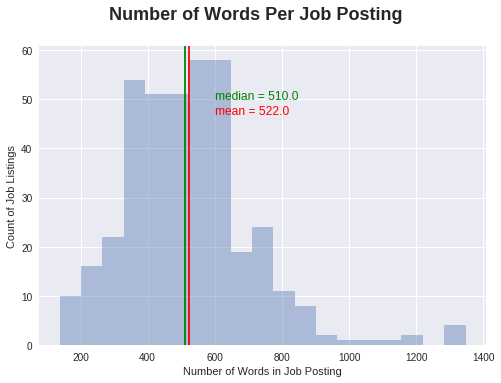

In [57]:
fig = plt.figure()
sns.distplot(data['cnt_JD_Tokenized_minus_PUNC'],kde=False)
my_median = np.median(data['cnt_JD_Tokenized_minus_PUNC'])
my_mean = np.mean(data['cnt_JD_Tokenized_minus_PUNC'])
plt.axvline(my_median, 0,1,color='green')
plt.axvline(my_mean, 0,1,color='red')
plt.text(600,50,"median = " + str(my_median),rotation=0,color='green')
plt.text(600,47,"mean = " + str(round(my_mean,0)),rotation=0,color='red')
fig.suptitle('Number of Words Per Job Posting',size=18,fontweight='bold')
plt.xlabel('Number of Words in Job Posting')
plt.ylabel('Count of Job Listings')

### 2.2 What is the impact of English Stop Words?

In [58]:
## english stopwrods
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)

179

In [0]:
def remove_ENG_stopwords (x):
  w_filtered = [w for w in x if not w in stop_words]
  return w_filtered

In [0]:
data['JD_Tokenized_minus_ENG'] = data['JD_Tokenized_minus_PUNC'].apply(remove_ENG_stopwords,0)
data['cnt_JD_Tokenized_minus_ENG'] = data['JD_Tokenized_minus_ENG'].apply(len,0)
data['cnt_JD_Tokenized_minus_ENG']=pd.to_numeric(data['cnt_JD_Tokenized_minus_ENG'])

In [61]:
my_tokens_minus_ENG = []
def merge_tokens(x):
  for line in x:
    for w in line:
      my_tokens_minus_ENG.append(w)
merge_tokens(data['JD_Tokenized_minus_ENG'])
cfdist_minus_ENG = nltk.probability.FreqDist(my_tokens_minus_ENG)
cfdist_minus_ENG.most_common(10)

[('data', 3101),
 ('experience', 1809),
 ('business', 1664),
 ('product', 1325),
 ('team', 1098),
 ('work', 956),
 ('analytics', 759),
 ('skills', 704),
 ('marketing', 626),
 ('ability', 565)]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count of Job Listings')

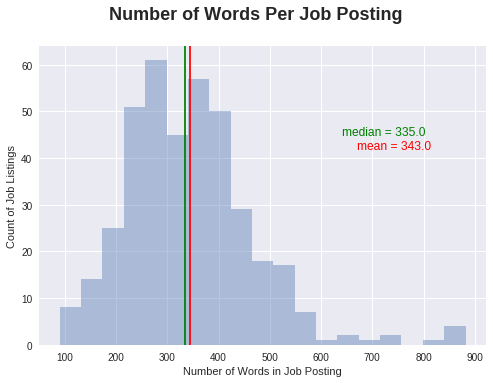

In [62]:
fig = plt.figure()
sns.distplot(data['cnt_JD_Tokenized_minus_ENG'],kde=False)
median_word_cnt = np.median(data['cnt_JD_Tokenized_minus_ENG'])
mean_word_cnt = np.mean(data['cnt_JD_Tokenized_minus_ENG'])
plt.axvline(median_word_cnt, 0,1,color='green')
plt.axvline(mean_word_cnt, 0,1,color='red')
plt.text(640,45,"median = " + str(median_word_cnt),rotation=0,color='green')
plt.text(670,42,"mean = " + str(round(mean_word_cnt,0)),rotation=0,color='red')
fig.suptitle('Number of Words Per Job Posting',size=18,fontweight='bold')
plt.xlabel('Number of Words in Job Posting')
plt.ylabel('Count of Job Listings')

In [0]:
## % ENG Stop Words (of all minus PUNC)
data['perc_ENG_stopwords'] = 1-np.divide(data['cnt_JD_Tokenized_minus_ENG'],data['cnt_JD_Tokenized_minus_PUNC'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count of Job Listings')

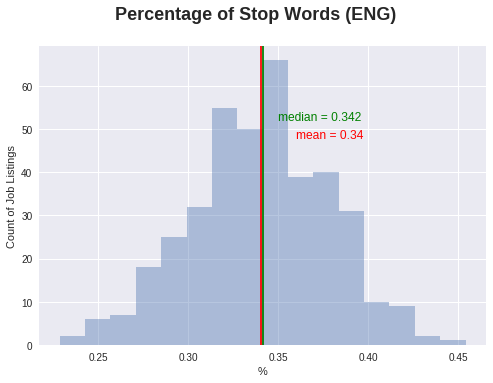

In [64]:
fig = plt.figure()
sns.distplot(data['perc_ENG_stopwords'],kde=False)
my_median = np.median(data['perc_ENG_stopwords'])
my_mean = np.mean(data['perc_ENG_stopwords'])
plt.axvline(my_median, 0,1,color='green')
plt.axvline(my_mean, 0,1,color='red')
plt.text(0.35,52,"median = " + str(round(my_median,3)),rotation=0,color='green')
plt.text(0.36,48,"mean = " + str(round(my_mean,3)),rotation=0,color='red')
fig.suptitle('Percentage of Stop Words (ENG)',size=18,fontweight='bold')
plt.xlabel('%')
plt.ylabel('Count of Job Listings')

In [65]:
data.sort_values('perc_ENG_stopwords',ascending=False).head()

,Company,Job_Description,JobID,Published_Title,Inferred_Title,Known_Name,JD_Tokenized,JD_Word_Cnt,JD_Tokenized_minus_PUNC,cnt_JD_Tokenized_minus_PUNC,JD_Tokenized_minus_ENG,cnt_JD_Tokenized_minus_ENG,perc_ENG_stopwords,JD_Tokenized_minus_DATA,cnt_JD_Tokenized_minus_DATA,perc_DATA_stopwords
392,Verve,is playing with data and teaching business sta...,71534b8145ffa296,BI Analyst,Business Intelligence,N,"[is, playing, with, data, and, teaching, busin...",678,"[is, playing, with, data, and, teaching, busin...",621,"[playing, data, teaching, business, stakeholde...",339,0.454106,"[playing, teaching, stakeholders, use, effecti...",316,0.067847
146,Thorn,thorn is a non-profit focused on building tech...,231feffbbeca1500,Data Scientist,Data Scientist,N,"[thorn, is, a, non-profit, focused, on, buildi...",483,"[thorn, is, a, non-profit, focused, on, buildi...",432,"[thorn, non-profit, focused, building, technol...",245,0.432870,"[non-profit, focused, building, technology, de...",233,0.048980
54,Scoot Network,scoot’s mission is electric vehicles for every...,f769f249a3a38b81,Data Analyst,Data Analyst,N,"[scoot, ’, s, mission, is, electric, vehicles,...",483,"[scoot, s, mission, is, electric, vehicles, fo...",424,"[scoot, mission, electric, vehicles, everyone,...",243,0.426887,"[scoot, mission, electric, vehicles, everyone,...",229,0.057613
74,Atlassian,atlassian is looking for a data engineer to jo...,d4e8037d3e06691b,Data Engineer,Data Engineer,Y,"[atlassian, is, looking, for, a, data, enginee...",913,"[atlassian, is, looking, for, a, data, enginee...",811,"[atlassian, looking, data, engineer, join, dat...",466,0.425401,"[looking, join, engineering, team, build, worl...",427,0.083691
212,ReferralExchange,"$90,000 - $120,000 a yeardo you understand wha...",7ec9bf06bb535cf0,Product Manager,Product Manager,N,"[$, 90,000, -, $, 120,000, a, yeardo, you, und...",664,"[$, 90,000, $, 120,000, a, yeardo, you, unders...",610,"[$, 90,000, $, 120,000, yeardo, understand, ta...",352,0.422951,"[$, 90,000, $, 120,000, yeardo, understand, ta...",341,0.031250


### 2.3 What is the impact of Data Stopwords?

In [66]:
## data stopwords
stop_words_data = []
for w in data['Company']:
  w = str(w)
  stop_words_data.append(w.lower())
for w in data['Inferred_Title']:
  w_tokens = word_tokenize(w)
  for token in w_tokens:
    stop_words_data.append(token.lower())
stop_words_data = set(stop_words_data)
len(stop_words_data)

288

In [0]:
def remove_DATA_stopwords (x):
  w_filtered = [w for w in x if not w in stop_words_data]
  return w_filtered

In [0]:
data['JD_Tokenized_minus_DATA'] = data['JD_Tokenized_minus_ENG'].apply(remove_DATA_stopwords,0)

In [0]:
data['cnt_JD_Tokenized_minus_DATA'] = data['JD_Tokenized_minus_DATA'].apply(len,0)
data['cnt_JD_Tokenized_minus_DATA']=pd.to_numeric(data['cnt_JD_Tokenized_minus_DATA'])

In [70]:
my_tokens_minus_DATA = []
def merge_tokens_data(x):
  for line in x:
    for w in line:
      my_tokens_minus_DATA.append(w)
merge_tokens_data(data['JD_Tokenized_minus_DATA'])
cfdist_minus_DATA = nltk.probability.FreqDist(my_tokens_minus_DATA)
cfdist_minus_DATA.most_common(20)

[('experience', 1809),
 ('team', 1098),
 ('work', 956),
 ('skills', 704),
 ('ability', 565),
 ('teams', 551),
 ('analysis', 546),
 ('years', 528),
 ('strong', 501),
 ('help', 477),
 ('insights', 473),
 ('company', 467),
 ('new', 461),
 ('role', 455),
 ('working', 440),
 ('management', 438),
 ('tools', 426),
 ('customer', 424),
 ('across', 421),
 ('build', 411)]

In [0]:
## % DATA Stop Words (of ENG)
data['perc_DATA_stopwords'] = 1-np.divide(data['cnt_JD_Tokenized_minus_DATA'],data['cnt_JD_Tokenized_minus_ENG'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Count of Job Listings')

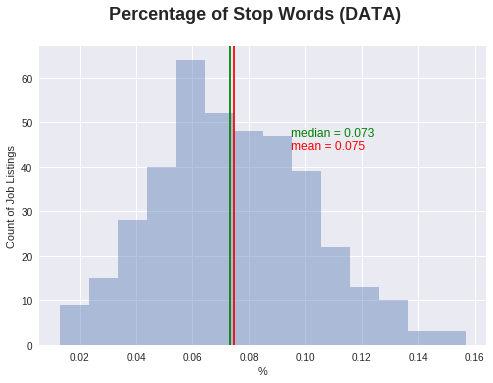

In [72]:
fig = plt.figure()
sns.distplot(data['perc_DATA_stopwords'],kde=False)
my_median = np.median(data['perc_DATA_stopwords'])
my_mean = np.mean(data['perc_DATA_stopwords'])
plt.axvline(my_median, 0,1,color='green')
plt.axvline(my_mean, 0,1,color='red')
plt.text(0.095,47,"median = " + str(round(my_median,3)),rotation=0,color='green')
plt.text(0.095,44,"mean = " + str(round(my_mean,3)),rotation=0,color='red')
fig.suptitle('Percentage of Stop Words (DATA)',size=18,fontweight='bold')
plt.xlabel('%')
plt.ylabel('Count of Job Listings')

### 2.4 What are the Professions we are considering (Inferred Titles)?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

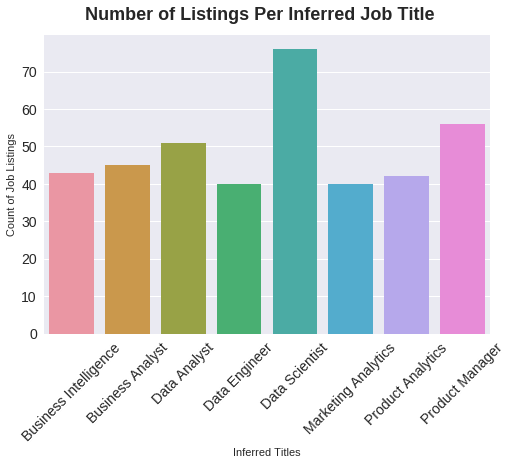

In [73]:
fig = plt.figure()
sns.countplot(x='Inferred_Title',data=data)
fig.suptitle('Number of Listings Per Inferred Job Title',size=18,fontweight='bold',y='0.95')
plt.xlabel('Inferred Titles')
plt.xticks(rotation=45,fontsize=14)
plt.ylabel('Count of Job Listings')
plt.yticks(fontsize=14)


In [74]:
## Viz
!pip install ggplot
from ggplot import *

    100% |████████████████████████████████| 2.2MB 10.6MB/s 


/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


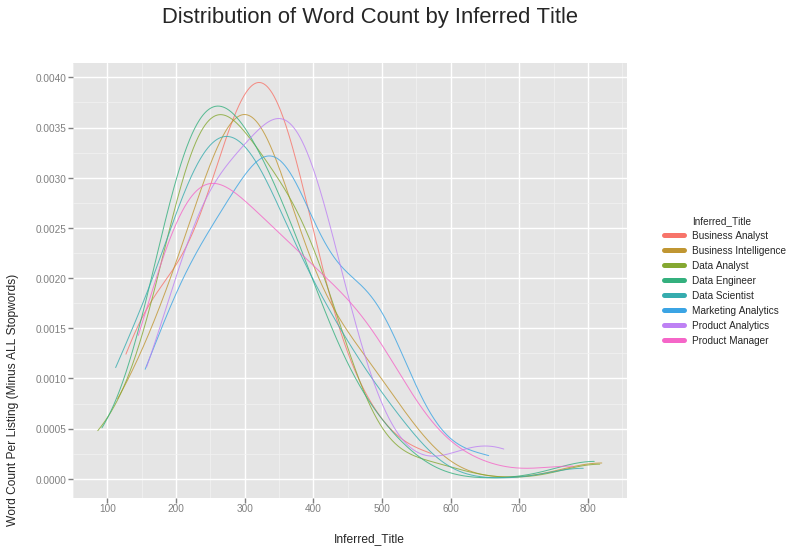

<ggplot: (-9223363290179030321)>

In [75]:
ggplot(data, aes(x='cnt_JD_Tokenized_minus_DATA', color='Inferred_Title')) +\
    geom_density(alpha=0.8) +\
    xlab("Inferred_Title") +\
    ylab("Word Count Per Listing (Minus ALL Stopwords)") +\
    ggtitle(element_text(text='Distribution of Word Count by Inferred Title', size=22))

### 2.5 Word Clouds by Inferred Title

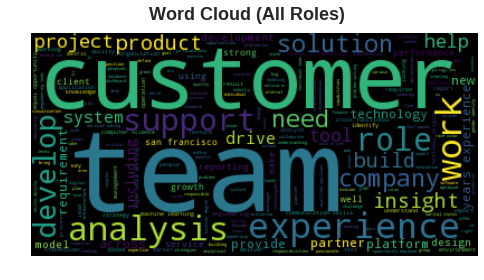

In [76]:
## customer, team, experience, analysis. Consider if experience here means working experience of customer experience
data_wordcloud = nltk.Text(my_tokens_minus_DATA)

fig = plt.figure()
fig.suptitle('Word Cloud (All Roles)',size=18,fontweight='bold',y='0.85')
wordcloud = WordCloud().generate(' '.join(data_wordcloud))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [0]:
def word_cloud_generate(x):
  word_cloud_text = []
  def merge_word_cloud_text(x):
    for line in x:
      for w in line:
        word_cloud_text.append(w)
  merge_word_cloud_text(data[data['Inferred_Title']==x]['JD_Tokenized_minus_DATA'])

  wordcloud = WordCloud().generate(' '.join(word_cloud_text))
  fig = plt.figure()
  fig.suptitle(x,size=18,fontweight='bold',y=0.85)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

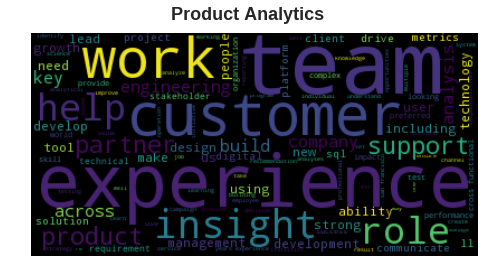

In [78]:
word_cloud_generate('Product Analytics') ## customer focused, insight

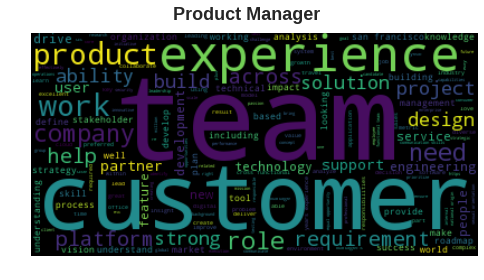

In [79]:
word_cloud_generate('Product Manager') ## even more team and customer focusd. product manager drive, product analytics support (insights)

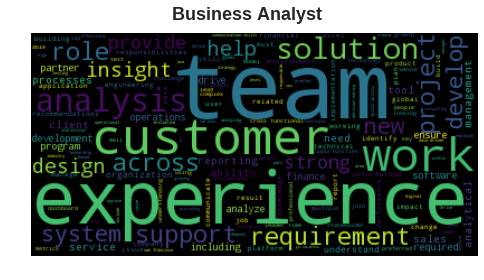

In [80]:
word_cloud_generate('Business Analyst') # analysisi, support, project based

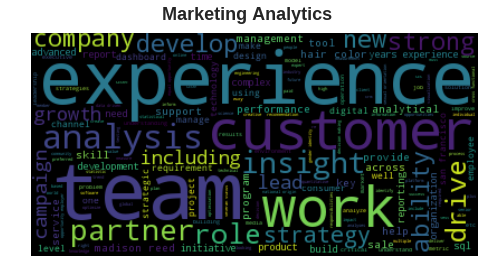

In [81]:
word_cloud_generate('Marketing Analytics') ## campaign focusesd

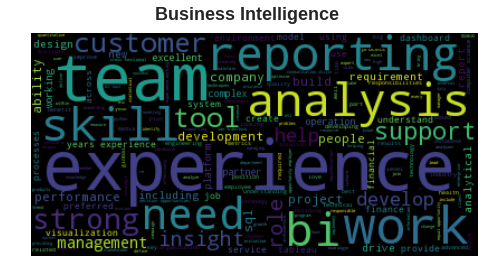

In [82]:
word_cloud_generate('Business Intelligence') ## reporting focused

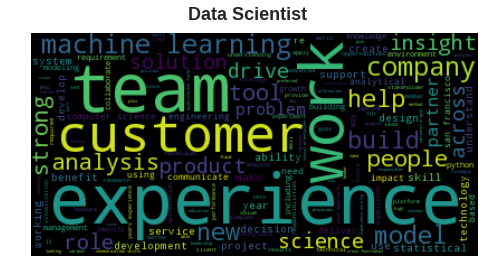

In [83]:

word_cloud_generate('Data Scientist') ## machinese learning, model, build, new?

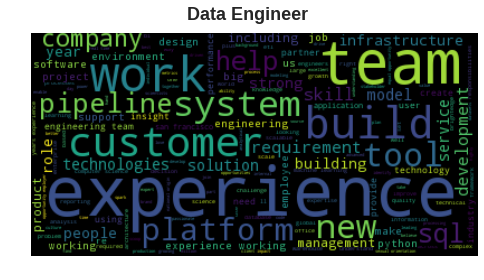

In [84]:
word_cloud_generate('Data Engineer') ## pipeline, tool, system, only sql shows up here? new?

### 2.5 What are Companies Like?

In [85]:
## which companies have represented multiple times in our dataset?
top_represented_companies = pd.DataFrame(data.groupby('Company').count().sort_values('JobID',ascending=False)['JobID'].head()).reset_index()
top_represented_companies.columns = ['Company',"No.Listings"]
top_represented_companies

,Company,No.Listings
0,Uber,8
1,Google,8
2,Twitter,7
3,Amazon,7
4,Autodesk,6


In [0]:
## create function to create word cloud for coompanies
def word_cloud_generate_company(x):
  word_cloud_text = []
  def merge_word_cloud_text(x):
    for line in x:
      for w in line:
        word_cloud_text.append(w)
  merge_word_cloud_text(data[data['Company']==x]['JD_Tokenized_minus_DATA'])

  wordcloud = WordCloud(background_color="white", mode="RGBA",mask=mask).generate(' '.join(word_cloud_text))
  wc = WordCloud(
    background_color="white",
    max_words=2000,
    mask=mask,
    stopwords=STOPWORDS,
    )

  # create coloring from image
  image_colors = ImageColorGenerator(mask)
  plt.figure(figsize=[7,7])
  plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

  plt.axis("off")

  plt.show()


![Google](https://raw.githubusercontent.com/yuanic/beyond_designations/master/GOOGLE.jpg)

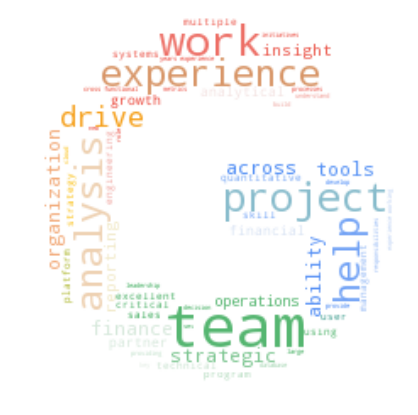

In [87]:
## google project driven
mask = np.array(Image.open(urlopen('https://raw.githubusercontent.com/yuanic/beyond_designations/master/GOOGLE.jpg')))
word_cloud_generate_company('Google')

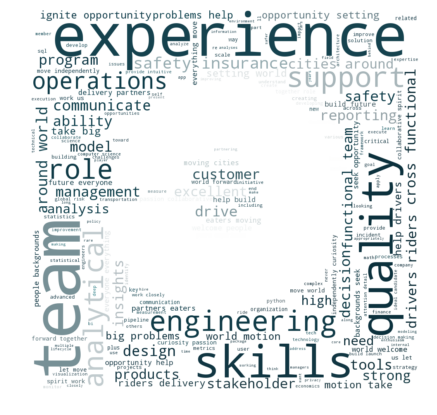

In [89]:
## uber quality
mask = np.array(Image.open(urlopen('https://raw.githubusercontent.com/yuanic/beyond_designations/master/UBER.jpeg')))
word_cloud_generate_company('Uber')

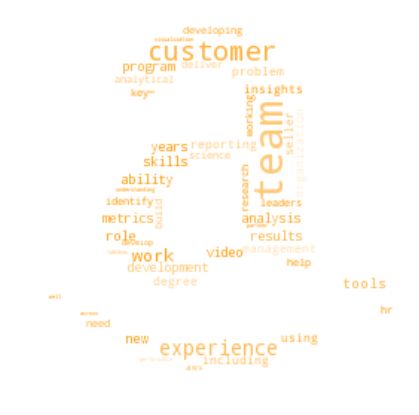

In [90]:
## amazon customer focused
mask = np.array(Image.open(urlopen('https://raw.githubusercontent.com/yuanic/beyond_designations/master/AMAZON.jpg')))
word_cloud_generate_company('Amazon')

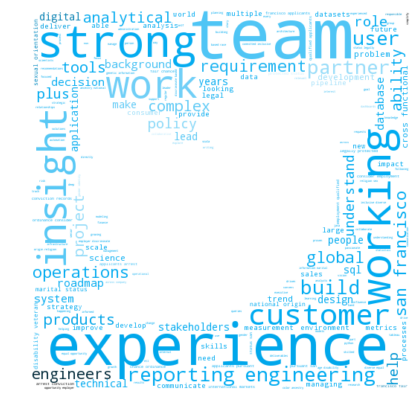

In [91]:
## Twitter is looking for insights
mask = np.array(Image.open(urlopen('https://raw.githubusercontent.com/yuanic/beyond_designations/master/TWITTER4.png')))
word_cloud_generate_company('Twitter')

## 3. Feature Engineering

### 3.1 TFID Vectorization

In [0]:
## weight term frequency by relevance using term frequency inverse document frequency method
from sklearn.feature_extraction.text import TfidfVectorizer
data['Final_JD']=nltk.Text(data['JD_Tokenized_minus_ENG'])
v = TfidfVectorizer()
X = v.fit_transform(data['Final_JD'].astype(str))
X_dense = X.toarray()

### 3.2 PCA Decomposition

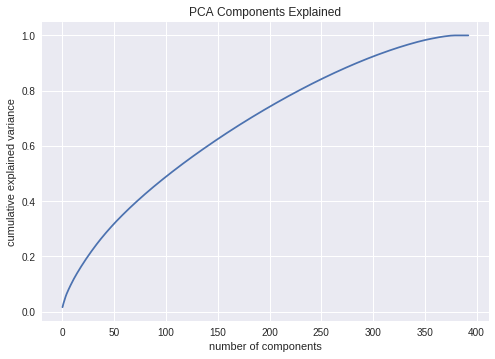

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_dense)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA Components Explained');

In [94]:
pca.n_components = 350
X_reduced = pca.fit_transform(X_dense)
X_reduced.shape

(393, 350)

## 4. Modeling: Classification

### 4.1 Classification: Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler

#Train and Test splitting of data
X = X_reduced
y = data['Inferred_Title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)

t_ntrees = []
t_depth =[]
t_accuracy=[]


for n_trees in range(1, 50, 1):
    for depth in range(1, 10, 1):
        model = RandomForestClassifier(n_estimators = n_trees, max_depth = depth, random_state=50)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        t_ntrees.append(n_trees)
        t_depth.append(depth)
        t_accuracy.append(scores.mean())

output1 = pd.DataFrame.from_dict(t_ntrees)
output2 = pd.DataFrame.from_dict(t_depth)
output3 = pd.DataFrame.from_dict(t_accuracy)
output1.columns=['ntrees']
output2.columns=['depth']
output3.columns=['accuracy']
output = output1.join(output2).join(output3)
output.sort_values(['accuracy'],ascending=False).head()

,ntrees,depth,accuracy
367,41,8,0.361909
358,40,8,0.357040
430,48,8,0.354232
376,42,8,0.354128
412,46,8,0.353594


In [123]:
model1 = RandomForestClassifier(n_estimators = 41, max_depth=8, random_state=50)
model1.fit(X_train, y_train)
scores = cross_val_score(model1, X_train, y_train, cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.29310345 0.31578947 0.35714286 0.49056604 0.35294118], Average AUC 0.3619085986618734


In [142]:
## predicted accuracy
y_predicted = model1.predict(X_test)
y1 = pd.DataFrame(y_test).reset_index()
y2 = pd.DataFrame(y_predicted).reset_index()
outcome1 = pd.concat([y1,y2],axis=1)
outcome1.columns = ['Original_Posting_Index',"Actual_Inferred_Title","X2","Predicted_Inferred_Title"]
outcome1 = outcome[['Original_Posting_Index','Actual_Inferred_Title','Predicted_Inferred_Title']]
len(outcome1[outcome1['Actual_Inferred_Title']==outcome1['Predicted_Inferred_Title']])/len(outcome1)

0.4406779661016949

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

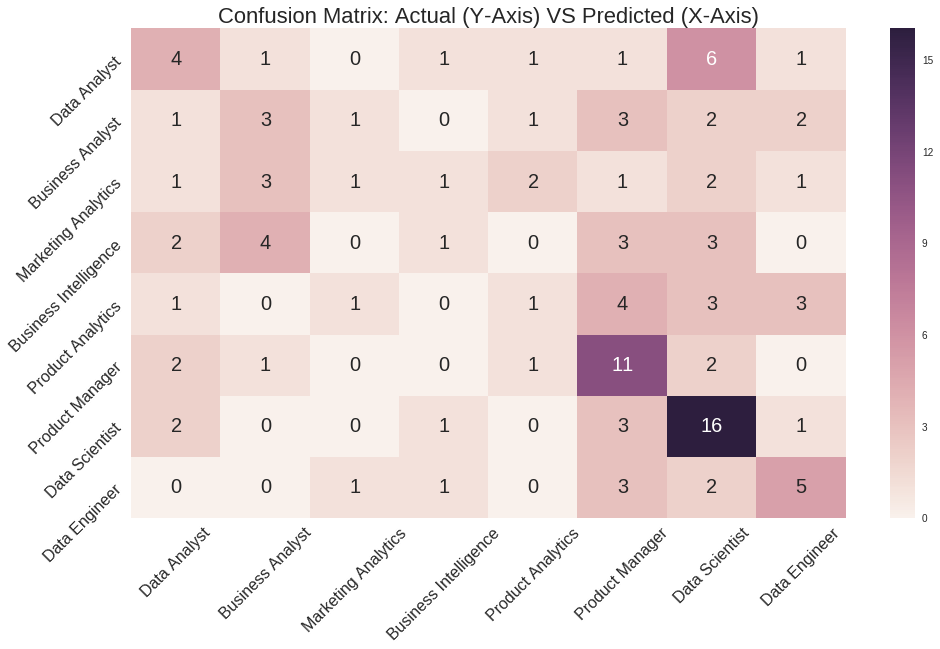

In [143]:
f, ax = plt.subplots(1,1,figsize=(16,9))
sns.heatmap(confusion_matrix(y_test, y_predicted,labels=["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]),annot=True,annot_kws={"size": 20})
ax.set_title('Confusion Matrix: Actual (Y-Axis) VS Predicted (X-Axis)', fontsize=22); 
ax.xaxis.set_ticklabels(["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]); 
ax.yaxis.set_ticklabels(reversed(["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]))
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=45,fontsize=16)



In [144]:
outcome1[outcome1['Actual_Inferred_Title']=='Data Analyst']

,Original_Posting_Index,Actual_Inferred_Title,Predicted_Inferred_Title
1,50,Data Analyst,Product Analytics
14,357,Data Analyst,Product Manager
17,28,Data Analyst,Data Analyst
27,261,Data Analyst,Product Manager
44,29,Data Analyst,Product Manager
53,46,Data Analyst,Data Analyst
56,270,Data Analyst,Data Analyst
66,38,Data Analyst,Data Scientist
68,324,Data Analyst,Product Analytics
76,32,Data Analyst,Business Intelligence


In [145]:
import textwrap
strs = data.iloc[328]['Job_Description']
print("Company: ", data.iloc[328]['Company'])
print("Published: ", data.iloc[328]['Published_Title'])
print("Inferred: ", data.iloc[328]['Inferred_Title'])
print(textwrap.fill(strs, 125))

Company:  Esurance
Published:  Sr. Data Analyst
Inferred:  Data Analyst
esurance is looking for a sr. manager, business intelligence to join a dynamic and award-winning team of individuals who are
committed to making insurance smarter, easier, and dare we say- cooler. as part of a growing company that is focused on
providing an outstanding customer experience, you’ll have the opportunity to expand your skills and discover your potential.
if you’re looking for a career at a socially conscious company that offers great benefits — including matching 401k and
tuition reimbursement — then you may have just found your new home. esurance combines the spunk of a startup company with the
backing of allstate (the largest publicly held personal lines insurer in the u.s.) to create a unique, energized, and
exciting place to work.  the sr. bi manager is responsible for the management of activities of the business intelligence
team. manage the development and enhancement of business intelligence and

### 4.2 Classification: K Nearest Neighbors

In [162]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = []
n_accuracy = []

for k in range(1, 25, 1):
  model = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
  n_neighbors.append(k)
  n_accuracy.append(scores.mean())

output1 = pd.DataFrame.from_dict(n_neighbors)
output2 = pd.DataFrame.from_dict(n_accuracy)
output1.columns=['n_neighbors']
output2.columns=['accuracy']
output = output1.join(output2)
output.sort_values(['accuracy'],ascending=False).head()



,n_neighbors,accuracy
20,21,0.427343
23,24,0.426028
21,22,0.412622
22,23,0.401068
19,20,0.398087


In [163]:
model2 = KNeighborsClassifier(n_neighbors=21)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [164]:
scores = cross_val_score(model2, X_train, y_train, cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.37931034 0.36842105 0.42857143 0.50943396 0.45098039], Average AUC 0.4273434360903215


In [165]:
## predicted accuracy
y_predicted = model2.predict(X_test)
y1 = pd.DataFrame(y_test).reset_index()
y2 = pd.DataFrame(y_predicted).reset_index()
outcome2 = pd.concat([y1,y2],axis=1)
outcome2.columns = ['Original_Posting_Index',"Actual_Inferred_Title","X2","Predicted_Inferred_Title"]
outcome2 = outcome2[['Original_Posting_Index','Actual_Inferred_Title','Predicted_Inferred_Title']]
len(outcome2[outcome2['Actual_Inferred_Title']==outcome2['Predicted_Inferred_Title']])/len(outcome2)

0.4406779661016949

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

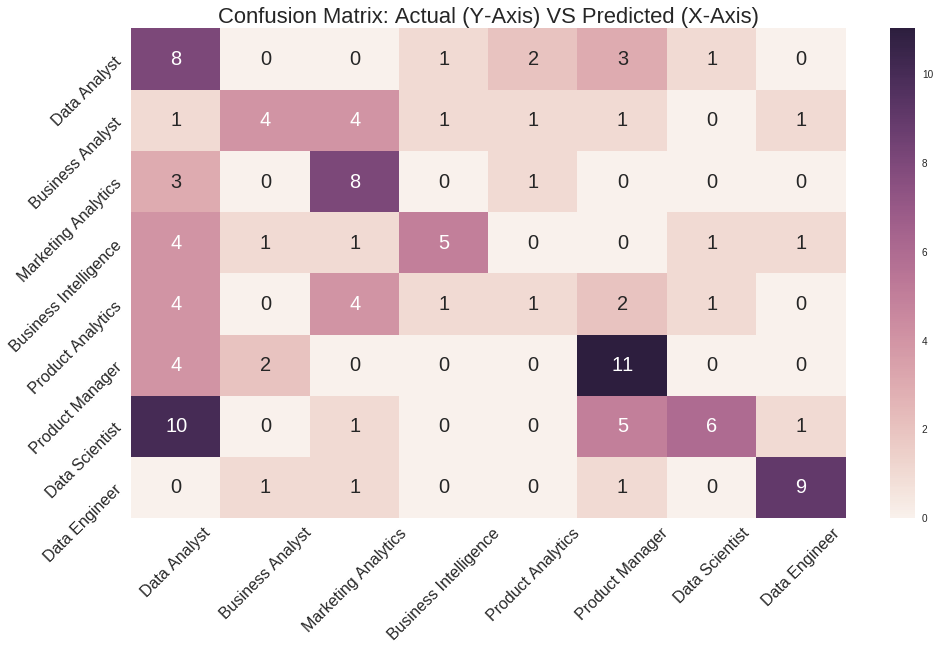

In [166]:
f, ax = plt.subplots(1,1,figsize=(16,9))
sns.heatmap(confusion_matrix(y_test, y_predicted,labels=["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]),annot=True,annot_kws={"size": 20})
ax.set_title('Confusion Matrix: Actual (Y-Axis) VS Predicted (X-Axis)', fontsize=22); 
ax.xaxis.set_ticklabels(["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]); 
ax.yaxis.set_ticklabels(reversed(["Data Analyst","Business Analyst", "Marketing Analytics", "Business Intelligence","Product Analytics","Product Manager","Data Scientist","Data Engineer"]))
plt.xticks(rotation=45,fontsize=16)
plt.yticks(rotation=45,fontsize=16)

In [116]:
outcome[outcome['Actual_Inferred_Title']=='Data Analyst']

,Original_Posting_Index,Actual_Inferred_Title,Predicted_Inferred_Title
1,50,Data Analyst,Product Analytics
14,357,Data Analyst,Product Manager
17,28,Data Analyst,Data Analyst
27,261,Data Analyst,Product Manager
44,29,Data Analyst,Product Manager
53,46,Data Analyst,Data Analyst
56,270,Data Analyst,Data Analyst
66,38,Data Analyst,Data Scientist
68,324,Data Analyst,Product Analytics
76,32,Data Analyst,Business Intelligence


## 5. Modeling: Clustering

### 5.1 Clustering:  K-Means 

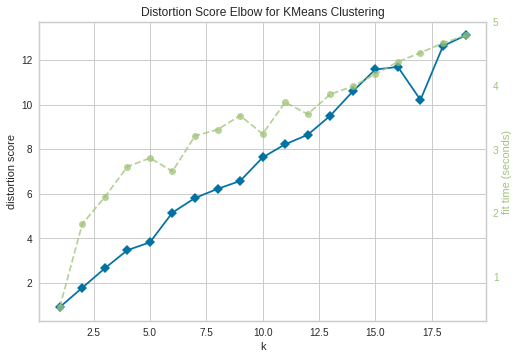

In [118]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X_dense)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

### 5.2 Clustering: DB Scan

In [119]:
from sklearn.cluster import DBSCAN
DB =  DBSCAN()
y_DB = DB.fit_predict(X_dense)
np.unique(y_DB, return_counts=True)

(array([-1]), array([393]))

## 6. Conclusion


### 6.1 Machine Learning Key Takeaways



*  Both Classification Methods had the same accuracy (44.06%)
*  Clustering however suggests that there is no significant similarities among the job postings, whether it is by role or company.
*  NLP is hard. We need to think about how we handle words and what context they are used in
* Test out different n-gram settings when vectorizing with TFID
* Use PorterStemmer to stem words


### 6.2 Data & Python Learning Points


* Using Beautiful Soup to scrape the web
* Creating dunctions and loops for repititive tasks
* Creating "fancy" word clouds can by easy!



### 6.3 Beyond Designations Conclusion

* Many Data Analyst roles get misclassified as Data Scientist.
* Product Analytics roles get misclassified as Data Scientist and Product Managers, but Product Managers do get get misclassified as much.
* Do not overlook a job just because of its title
* Are companies not able to disitinctively describe what they are looking for?
* Perhaps every single role and every company is clearly distinct.
* Perhaps job postings with longer descrptions might have better signals for more accurate classification
* Hiring companies should consider how they can better position themselves to attract the right candidates